# Project

In this project, our aim is to building a model for predicting churn. Churn is the percentage of customers that stopped using your company's product or service during a certain time frame. Thus, in the given dataset, our label will be `Churn` column.

## Steps
- Read the `churn.csv` file and describe it. 
- Make at least 4 different analysis on Exploratory Data Analysis section. 
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Logistic Regression, Decision Trees and one other appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Adeniran, Temilade Rukayat</h2>

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read csv
data = pd.read_csv("churn.csv")
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [3]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analys missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
Churn              3333 non-null int64
AccountWeeks       3333 non-null int64
ContractRenewal    3333 non-null int64
DataPlan           3333 non-null int64
DataUsage          3333 non-null float64
CustServCalls      3333 non-null int64
DayMins            3333 non-null float64
DayCalls           3333 non-null int64
MonthlyCharge      3333 non-null float64
OverageFee         3333 non-null float64
RoamMins           3333 non-null float64
dtypes: float64(5), int64(6)
memory usage: 286.5 KB


In [4]:
data.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [5]:
data.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [6]:
pd.DataFrame(data.keys())

,0
0,Churn
1,AccountWeeks
2,ContractRenewal
3,DataPlan
4,DataUsage
5,CustServCalls
6,DayMins
7,DayCalls
8,MonthlyCharge
9,OverageFee


In [7]:
data.nunique()

Churn                 2
AccountWeeks        212
ContractRenewal       2
DataPlan              2
DataUsage           174
CustServCalls        10
DayMins            1667
DayCalls            119
MonthlyCharge       627
OverageFee         1024
RoamMins            162
dtype: int64

# Exploratory Data Analysis

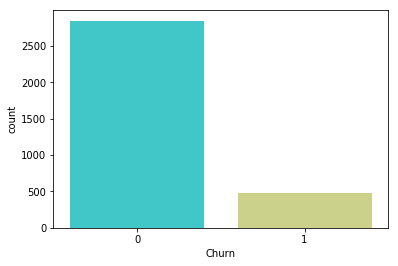

In [8]:
# Our label Distribution (countplot)
sns.countplot(data['Churn'], palette = 'rainbow')

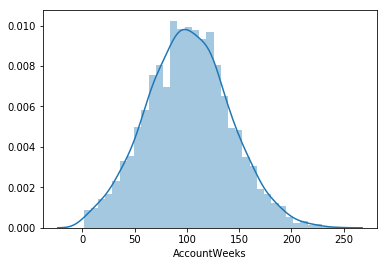

In [9]:
# Example EDA
sns.distplot(data['AccountWeeks'])

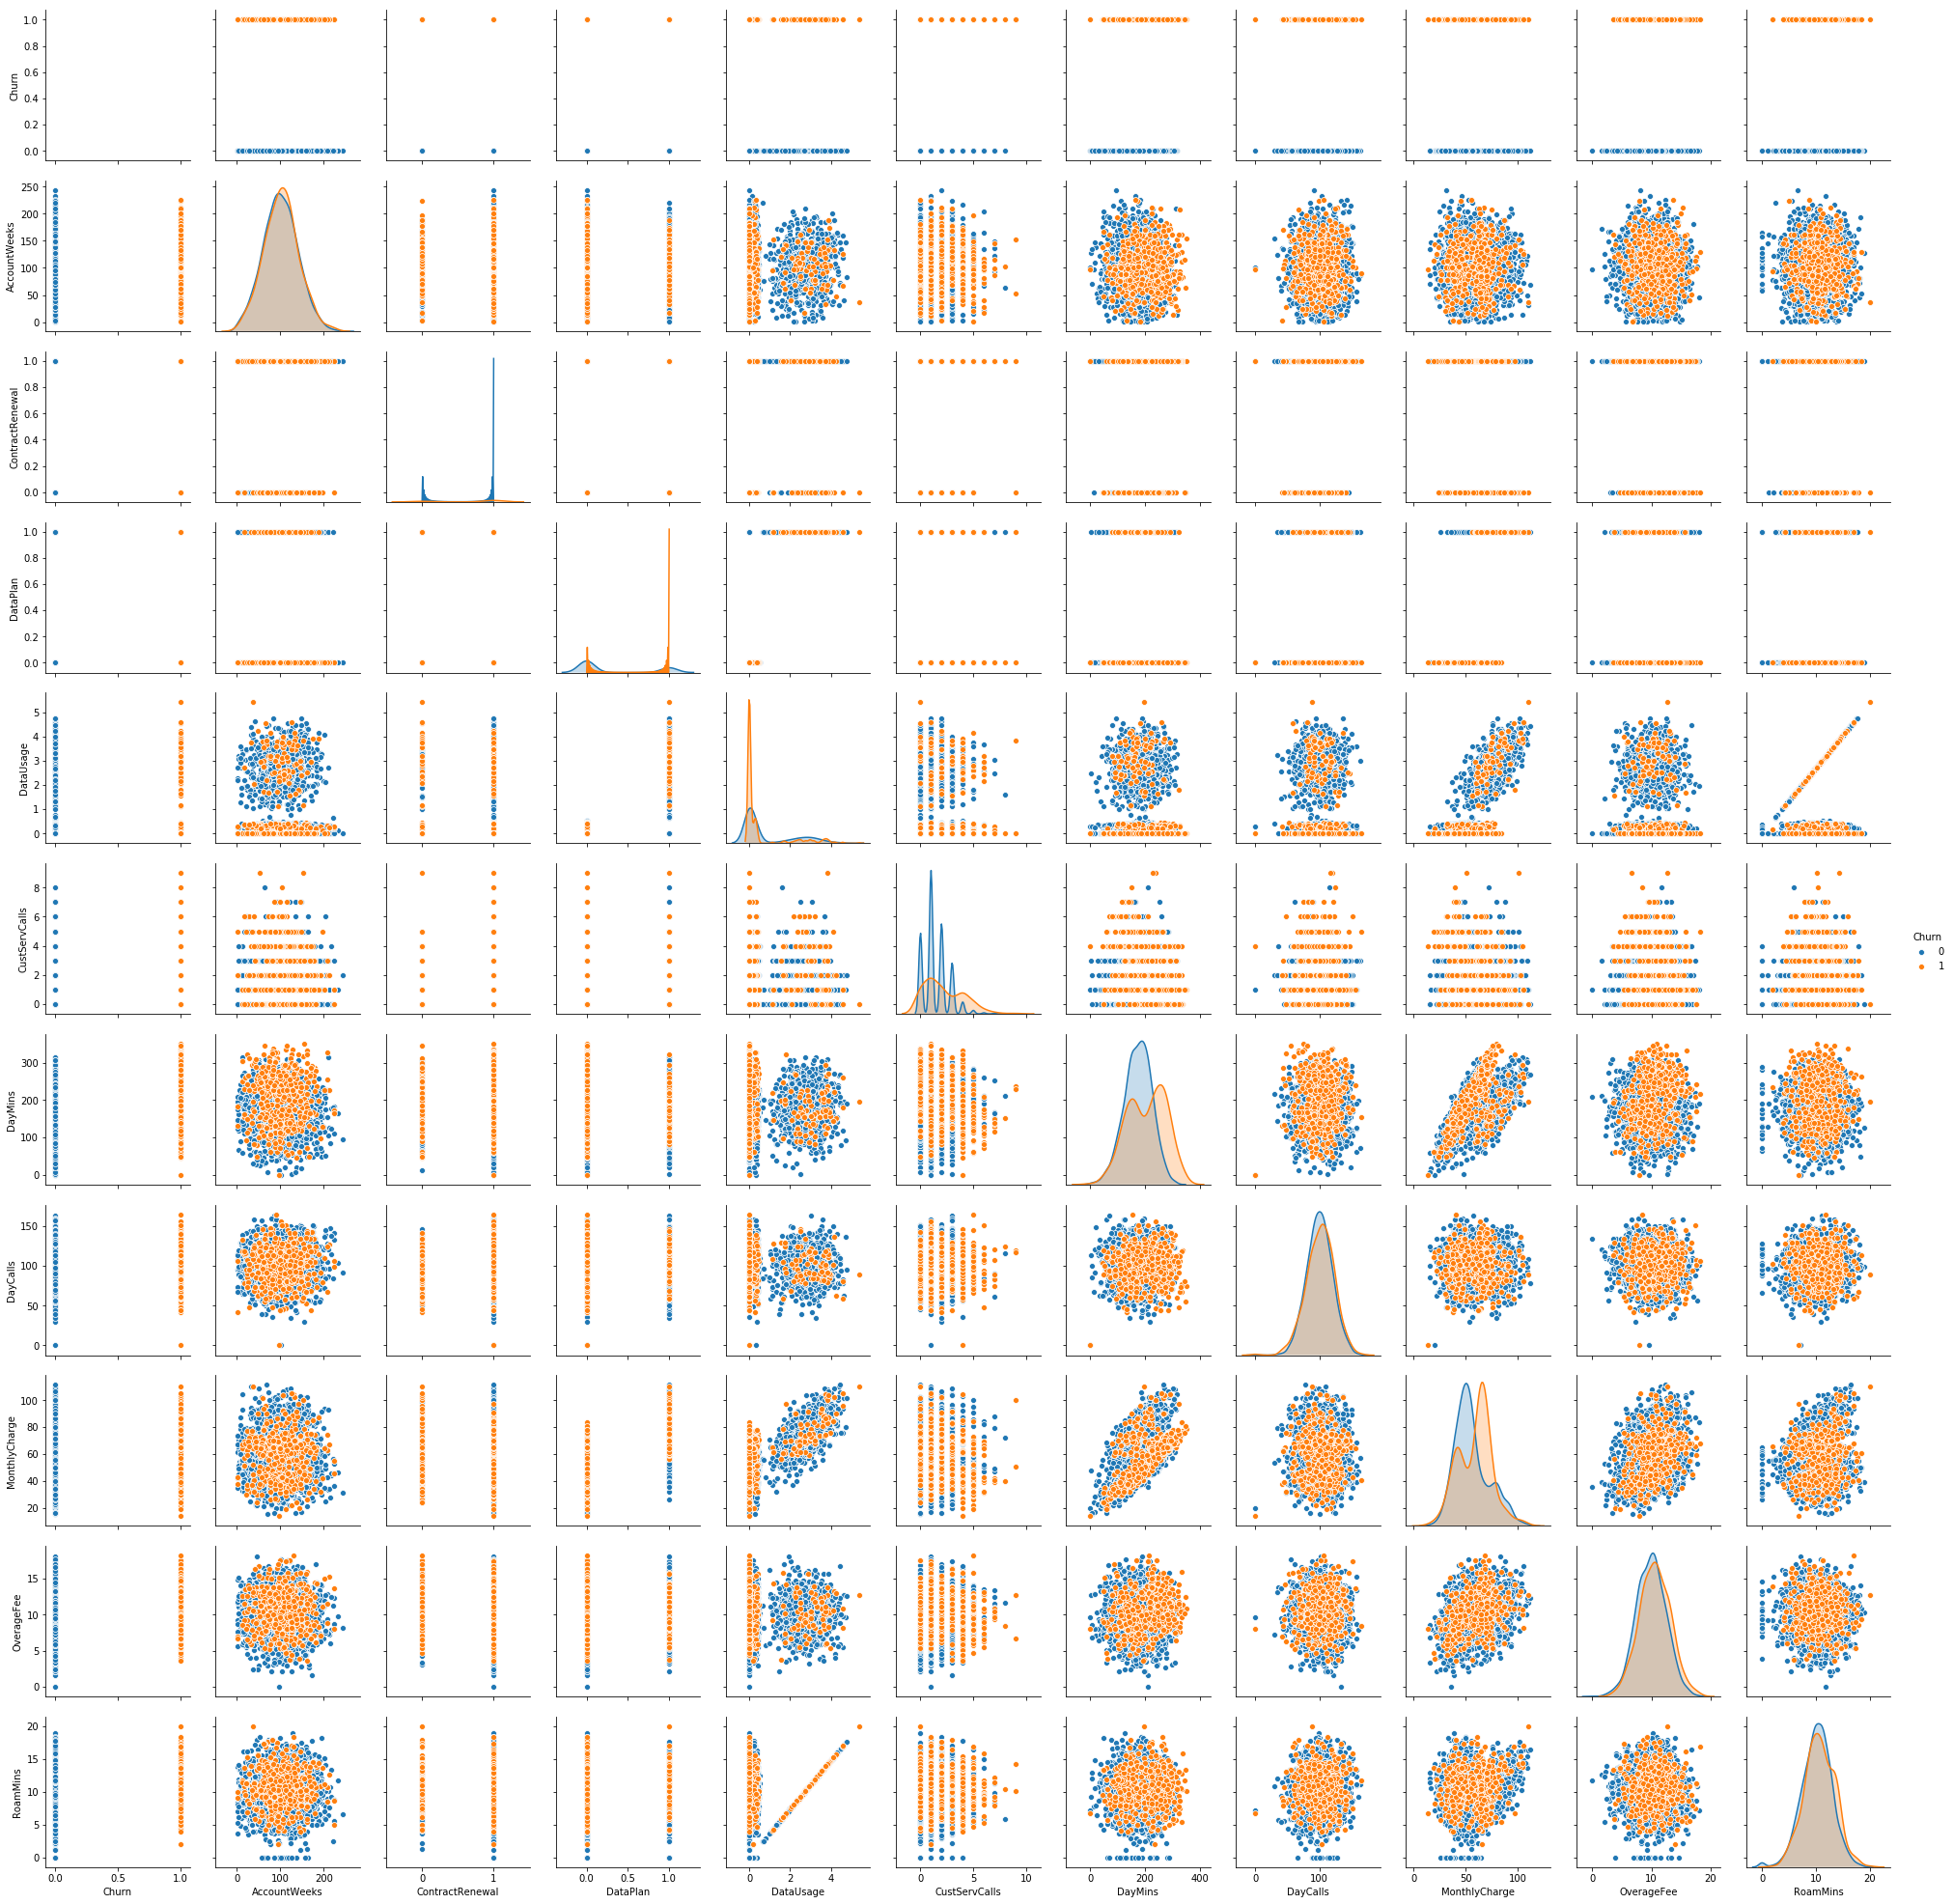

In [10]:
sns.pairplot(data, hue = 'Churn')

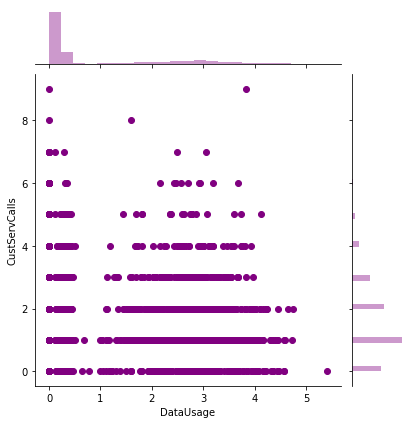

In [11]:
sns.jointplot(x = 'DataUsage', y = 'CustServCalls', kind = 'scatter', data = data, color="purple")

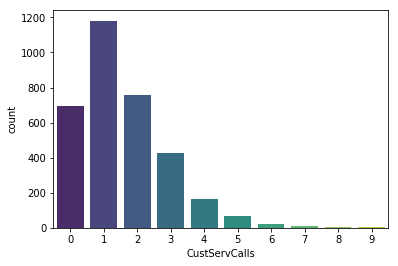

In [12]:
sns.countplot(data['CustServCalls'], palette = 'viridis')

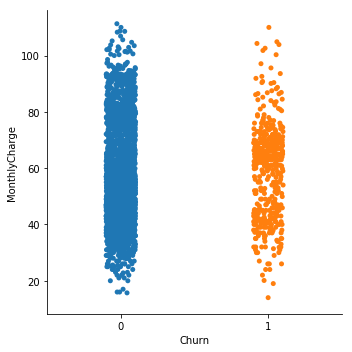

In [13]:
sns.catplot('Churn','MonthlyCharge', data= data)

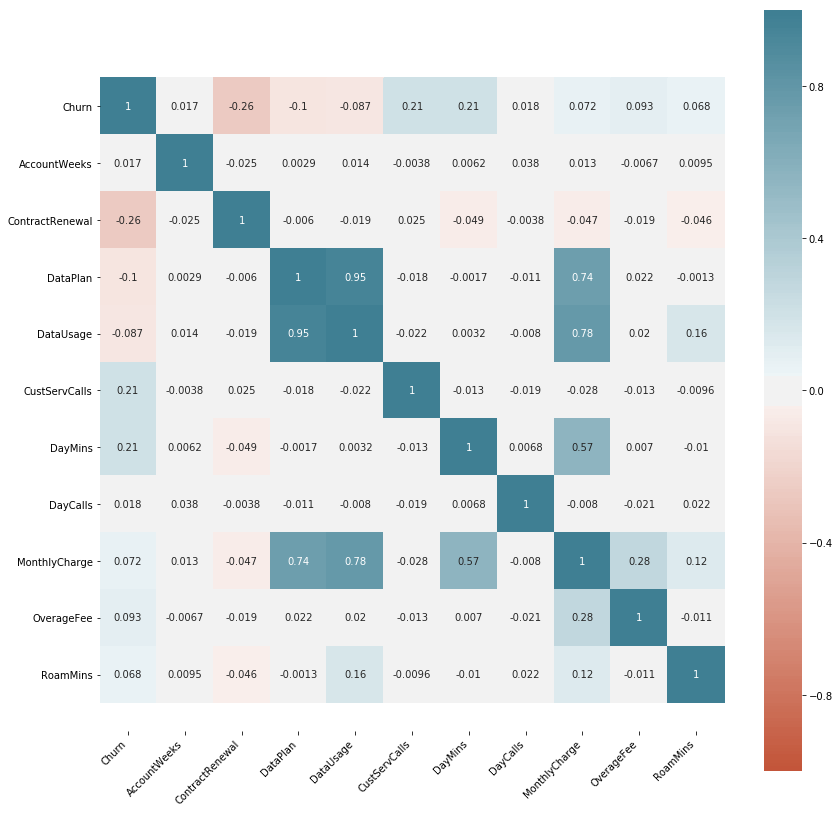

In [14]:
corr = data.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

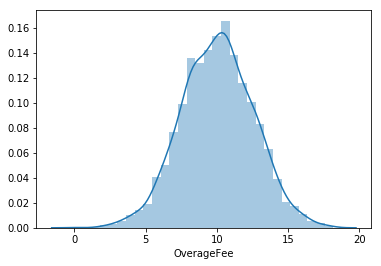

In [15]:
sns.distplot(data['OverageFee'], bins = 30);

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [16]:
#Checking for duplicated values
data.duplicated().sum()

0

In [17]:
from scipy import stats
a = np.abs(stats.zscore(data))
a

array([[0.41167182, 0.67648946, 0.32758048, ..., 1.99072703, 0.0715836 ,
        0.08500823],
       [0.41167182, 0.14906505, 0.32758048, ..., 1.56451025, 0.10708191,
        1.24048169],
       [0.41167182, 0.9025285 , 0.32758048, ..., 0.26213309, 1.57434567,
        0.70312091],
       ...,
       [0.41167182, 1.83505538, 0.32758048, ..., 0.01858065, 1.73094204,
        1.3837779 ],
       [0.41167182, 2.08295458, 3.05268496, ..., 0.38390932, 0.81704825,
        1.87621082],
       [0.41167182, 0.67974475, 0.32758048, ..., 2.66049626, 1.28129669,
        1.24048169]])

In [18]:
outliers = list(set(np.where(a>3)[0]))
len(outliers)

414

In [19]:
data_new = data.drop(outliers, axis = 0)
data_new.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7


In [20]:
data_new.shape

(2919, 11)

In [21]:
X = data.drop('Churn', axis = 1, inplace = False)
X.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [22]:
y = data['Churn']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

In [23]:
#feature scaling is necessary for this dataset
from sklearn.preprocessing import RobustScaler
X = RobustScaler(quantile_range = (25,75)).fit_transform(X)

In [24]:
#Splitting the dataset into test and train data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state = 101)

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

## Logistic Regression Model

In [25]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
predictions = logmodel.predict(X_test)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate

In [28]:
cm = confusion_matrix(y_test,predictions)
cm

array([[847,  22],
       [110,  21]], dtype=int64)

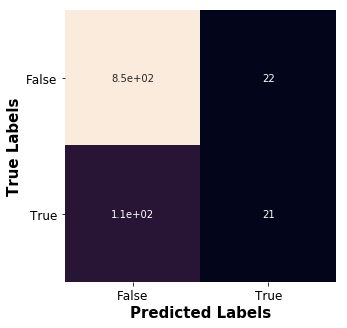

In [29]:
plt.figure(figsize=(9, 5))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15,fontweight = 'bold')
ax.set_ylabel('True Labels',fontsize = 15, fontweight = 'bold')
plt.show();

In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       869
           1       0.49      0.16      0.24       131

   micro avg       0.87      0.87      0.87      1000
   macro avg       0.69      0.57      0.58      1000
weighted avg       0.83      0.87      0.84      1000



In [31]:
cv = cross_validate(logmodel,X_train,y_train,cv=3,n_jobs=-1, return_estimator=True)
print('Mean Training Accuracy:', np.mean(cv['test_score']))
print('Test Accuracy:', cv['estimator'][0].score(X_test,y_test))

Mean Training Accuracy: 0.8564126202123634
Test Accuracy: 0.867


In [32]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test, predictions)
print(accuracy_score*100)

86.8


## Decision Tree Model

In [33]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=.30, random_state = 101)

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=4 , random_state=42)
dt.fit(X_train1,y_train1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [35]:
prediction1 = dt.predict(X_test1)
prediction1

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [36]:
cm1 = confusion_matrix(y_test1,prediction1)
cm1

array([[857,  12],
       [ 72,  59]], dtype=int64)

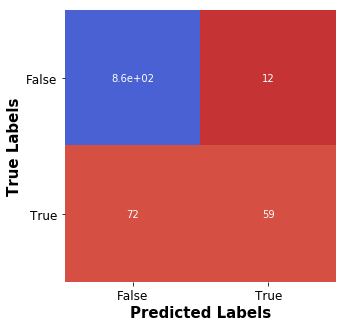

In [37]:
plt.figure(figsize=(9, 5))
cmap = sns.mpl_palette('coolwarm_r',20)
ax =sns.heatmap(cm1, square=True, cmap = cmap, annot=True, cbar=False)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15,fontweight = 'bold')
ax.set_ylabel('True Labels',fontsize = 15, fontweight = 'bold')
plt.show();

In [38]:
print(classification_report(y_test1,prediction1))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       869
           1       0.83      0.45      0.58       131

   micro avg       0.92      0.92      0.92      1000
   macro avg       0.88      0.72      0.77      1000
weighted avg       0.91      0.92      0.90      1000



In [39]:
cv = cross_validate(dt,X_train1,y_train1,cv=3,n_jobs=-1, return_estimator=True)
print('Mean Training Accuracy:', np.mean(cv['test_score']))
print('Test Accuracy:', cv['estimator'][0].score(X_test1,y_test1))

Mean Training Accuracy: 0.9138425056268445
Test Accuracy: 0.911


In [40]:
print("Accuracy of train:",dt.score(X_train1,y_train1))
print("Accuracy of test:",dt.score(X_test1,y_test1))

Accuracy of train: 0.9297042434633519
Accuracy of test: 0.916


Bias for training = 1-0.93 = 0.07  
Bias for test = 1-0.92 = 0.08  

Variance = test bias - training bias = 0.01  

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test1, prediction1)
print(accuracy_score*100)

91.60000000000001


## Random Forest

In [42]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(X,y,test_size=.30, random_state = 101)

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train2, y_train2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
prediction2 = rf.predict(X_test2)
prediction2

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [50]:
cm2 = confusion_matrix(y_test2,prediction2)
cm2

array([[857,  12],
       [ 60,  71]], dtype=int64)

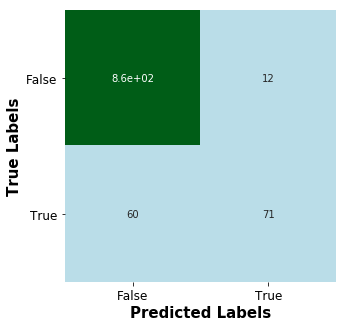

In [51]:
plt.figure(figsize=(9, 5))
cmap = sns.mpl_palette('ocean_r',10)
ax =sns.heatmap(cm2, square=True, cmap = cmap, annot=True, cbar=False)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15,fontweight = 'bold')
ax.set_ylabel('True Labels',fontsize = 15, fontweight = 'bold')
plt.show();

In [52]:
print(classification_report(y_test2,prediction2))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       869
           1       0.86      0.54      0.66       131

   micro avg       0.93      0.93      0.93      1000
   macro avg       0.89      0.76      0.81      1000
weighted avg       0.92      0.93      0.92      1000



In [53]:
print("Accuracy of train:",rf.score(X_train2,y_train2))
print("Accuracy of test:",rf.score(X_test2,y_test2))

Accuracy of train: 0.9914273467638234
Accuracy of test: 0.928


Bias for training = 1-0.99 = 0.01  
Bias for test = 1-0.94 = 0.06  

Variance = test bias - training bias = 0.05  

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test2, prediction2)
print(accuracy_score*100)

92.80000000000001


# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

### Answer

* The best performing model, taking the F1 Score into consideration is the **Random Forest**,  followed closely by the **Decision Tree Model.**

* Also, the Random Forest model predicted more accurate values and has the lowest wrongly predicted values (i.e the FP and FN)

* The model can be improved by tuning the hyperparameters of the algorithm. 

* In addition, dropping some columns(features) which have little impact on our prediction can help in improving our model.